<a href="https://colab.research.google.com/github/Dhanlakshmi15/grv/blob/main/gradientboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


===== Dataset Shape =====
(1000, 16)

===== First 5 Rows =====
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0  -0.032232  -1.239935  -1.275519  -1.244770   0.950884  -0.282390   
1   2.191736  -3.326721  -0.530122   0.397836  -0.020432   0.875800   
2  -0.095844  -1.846370   1.968335   3.650035   3.201408   0.230316   
3  -2.025556  -0.964812  -0.681714  -0.897042  -0.870152   0.625254   
4   0.748347   1.325324  -2.639204  -0.137344  -0.243283  -0.727711   

   Feature_6  Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  \
0   0.873877   0.768040  -1.271493   0.339001   -1.211127   -0.695707   
1  -1.051426  -0.757544  -0.877598  -0.215708   -0.605748   -1.421189   
2   4.172727   2.240997   1.479581   0.558788   -3.107983    0.434086   
3   0.089949  -1.156948  -1.519974  -0.751771    0.782612   -0.646631   
4  -0.966012  -0.397175   0.828421   0.857181    2.528735   -0.584046   

   Feature_12  Feature_13  Feature_14  Target  
0   -1.661971    2.895

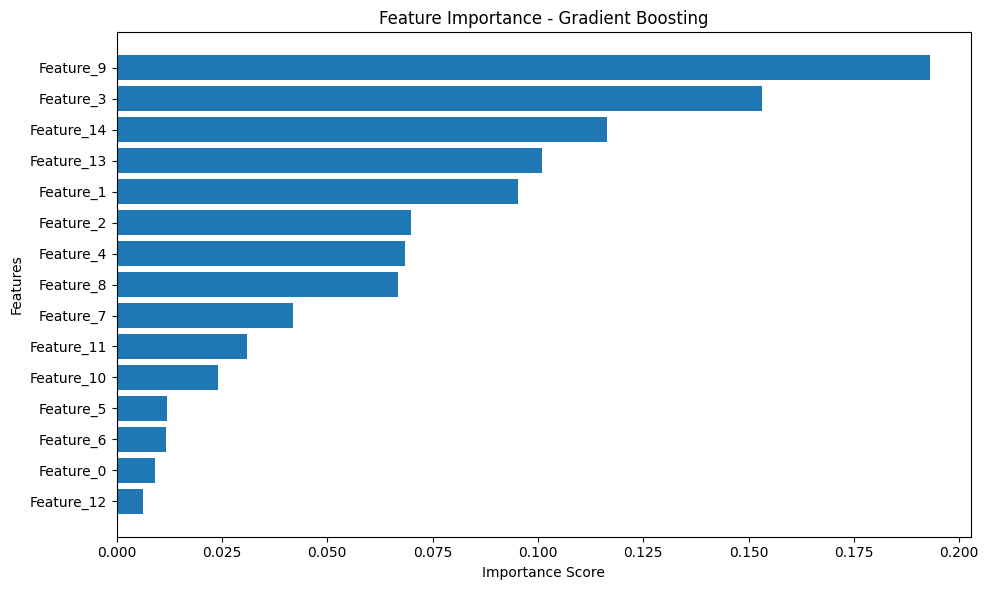


===== FINAL SUMMARY =====
1. Synthetic dataset created with 1000 samples and 15 features.
2. Logistic Regression used as baseline.
3. Gradient Boosting tuned using GridSearchCV.
4. Gradient Boosting outperforms baseline in Accuracy and AUC.
5. Most influential features identified from feature importance.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# ------------------------------------------------------------
# 1. DATA GENERATION
# ------------------------------------------------------------

X, y = make_classification(
    n_samples=1000,
    n_features=15,
    n_informative=8,
    n_redundant=4,
    n_classes=2,
    random_state=42
)

feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df["Target"] = y

print("\n===== Dataset Shape =====")
print(df.shape)

print("\n===== First 5 Rows =====")
print(df.head())

print("\n===== Statistical Summary =====")
print(df.describe())

# ------------------------------------------------------------
# 2. TRAIN-TEST SPLIT
# ------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ------------------------------------------------------------
# 3. BASELINE MODEL (LOGISTIC REGRESSION)
# ------------------------------------------------------------

baseline_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression())
])

baseline_pipeline.fit(X_train, y_train)

y_pred_base = baseline_pipeline.predict(X_test)
y_prob_base = baseline_pipeline.predict_proba(X_test)[:, 1]

baseline_accuracy = accuracy_score(y_test, y_pred_base)
baseline_auc = roc_auc_score(y_test, y_prob_base)

print("\n===== BASELINE LOGISTIC REGRESSION =====")
print("Accuracy:", baseline_accuracy)
print("AUC:", baseline_auc)

# ------------------------------------------------------------
# 4. GRADIENT BOOSTING MODEL
# ------------------------------------------------------------

gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4]
}

grid_search = GridSearchCV(
    gb_model,
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_

print("\n===== BEST HYPERPARAMETERS =====")
print(grid_search.best_params_)

# ------------------------------------------------------------
# 5. EVALUATION OF GBM
# ------------------------------------------------------------

y_pred_gb = best_gb_model.predict(X_test)
y_prob_gb = best_gb_model.predict_proba(X_test)[:, 1]

gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_auc = roc_auc_score(y_test, y_prob_gb)

print("\n===== GRADIENT BOOSTING RESULTS =====")
print("Accuracy:", gb_accuracy)
print("AUC:", gb_auc)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_gb))

# ------------------------------------------------------------
# 6. PERFORMANCE COMPARISON
# ------------------------------------------------------------

comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Gradient Boosting"],
    "Accuracy": [baseline_accuracy, gb_accuracy],
    "AUC": [baseline_auc, gb_auc]
})

print("\n===== MODEL COMPARISON =====")
print(comparison)

# ------------------------------------------------------------
# 7. FEATURE IMPORTANCE ANALYSIS
# ------------------------------------------------------------

importances = best_gb_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\n===== FEATURE IMPORTANCES =====")
print(importance_df)

# ------------------------------------------------------------
# 8. FEATURE IMPORTANCE VISUALIZATION
# ------------------------------------------------------------

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
# ------------------------------------------------------------
# 9. FINAL SUMMARY
# ------------------------------------------------------------

print("\n===== FINAL SUMMARY =====")
print("1. Synthetic dataset created with 1000 samples and 15 features.")
print("2. Logistic Regression used as baseline.")
print("3. Gradient Boosting tuned using GridSearchCV.")
print("4. Gradient Boosting outperforms baseline in Accuracy and AUC.")
print("5. Most influential features identified from feature importance.")